In [328]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.ticker import FuncFormatter
from glob import glob

In [329]:
def read_csv(filename):
    # try to find csv file into subdirectory. If there are many, pick the newest
    files_found = glob(pathname="csv/"+filename)
    if len(files_found) == 0:
        # if not found then we are in the notebook dir and we need to go one level above
        files_found = glob(pathname="../csv/"+filename)

    files_found.sort(key=os.path.getmtime)
    path = files_found[-1]

    print("Reading file", path)
    df = pd.read_csv(path)
    return df

In [330]:
df_throughput = read_csv("throughput-*.csv")
df_throughput.describe()

Reading file ../csv/throughput-4-500.csv


,throughput,time,numworkers,streamsize
count,495.000000,495.000000,495.0,495.0
mean,0.172094,1355.363636,4.0,500.0
std,0.035337,652.855169,0.0,0.0
min,0.089299,48.000000,4.0,500.0
25%,0.127625,998.000000,4.0,500.0
50%,0.183323,1146.000000,4.0,500.0
75%,0.200689,2114.000000,4.0,500.0
max,0.220217,2260.000000,4.0,500.0


In [331]:
df_throughput_pts = read_csv("throughput_points-*.csv")
df_throughput_pts.describe()

Reading file ../csv/throughput_points-4-500.csv


,throughput,time,numworkers,streamsize
count,500.000000,500.000000,500.0,500.0
mean,0.171655,1353.634000,4.0,500.0
std,0.036380,659.546197,0.0,0.0
min,0.031250,32.000000,4.0,500.0
25%,0.126160,996.750000,4.0,500.0
50%,0.183302,1148.500000,4.0,500.0
75%,0.200692,2117.250000,4.0,500.0
max,0.220751,2265.000000,4.0,500.0


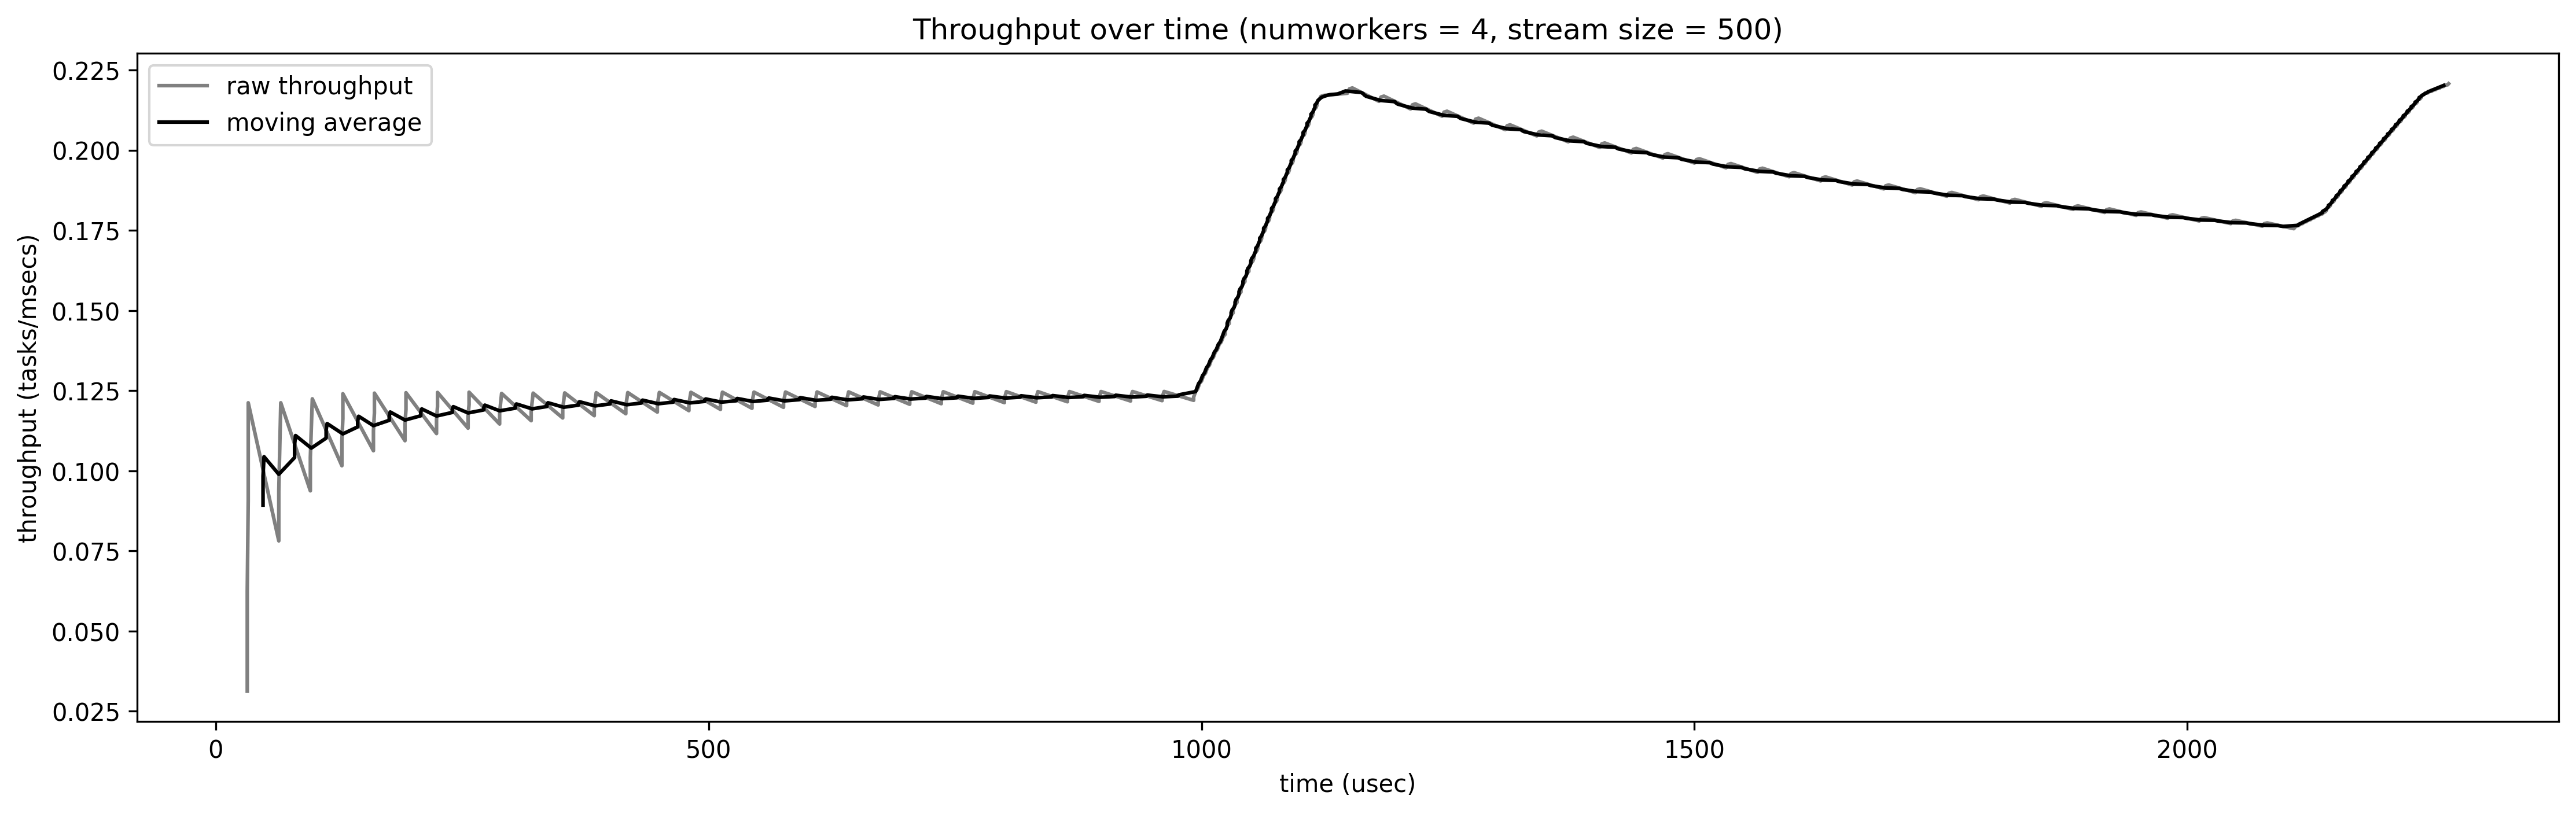

In [341]:
title = f'Throughput over time (numworkers = {df_throughput["numworkers"][0]}, stream size = {df_throughput["streamsize"][0]})'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
df_throughput_pts.plot(ax=axs, x="time", y="throughput", color="grey", title=title, label="raw throughput")
df_throughput.plot(ax=axs, x="time", y="throughput", color="black", title=title, label="moving average")

axs.set_xlabel("time (usec)")
axs.set_ylabel("throughput (tasks/msecs)")

plt.show()

In [ ]:
df_arrival = read_csv("arrival*.csv")
df_arrival.insert(0, 'count', range(1, 1 + len(df_arrival)))
df_arrival.head()

Reading file ../csv/arrival_time-4-500.csv


,count,time
0,1,17
1,2,687
2,3,1346
3,4,2003
4,5,2601


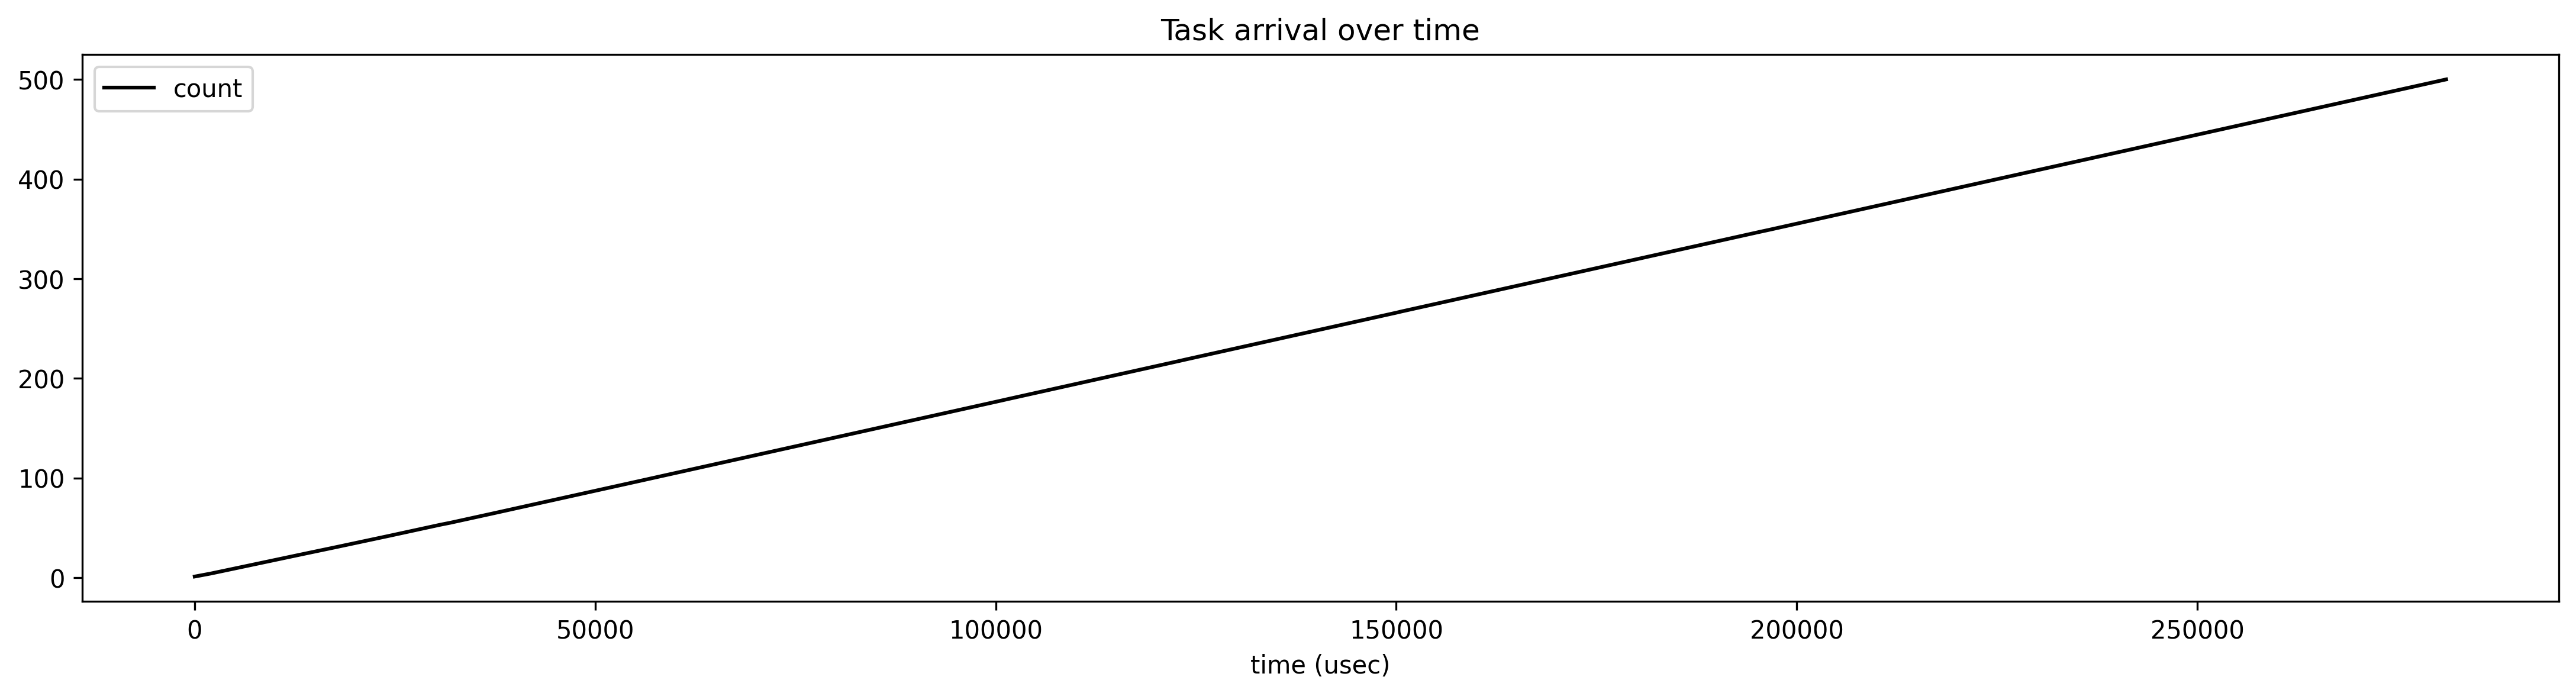

In [ ]:

fig, axs = plt.subplots(figsize=(18, 4),dpi=300)
df_arrival.plot(ax=axs, x="time", y="count", color="black", title="Task arrival over time")
axs.set_xlabel("time (usec)")

plt.show()